In [84]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import hashlib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit,StratifiedKFold,GridSearchCV,cross_val_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [62]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fetal-health-classification/fetal_health.csv


In [2]:
df = pd.read_csv('/kaggle/input/fetal-health-classification/fetal_health.csv')

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df[df.fetal_health==3]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
5,134.0,0.001,0.000,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.000,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.000,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.000,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.000,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,128.0,0.000,0.002,0.007,0.005,0.0,0.002,65.0,2.6,0.0,...,63.0,192.0,6.0,0.0,103.0,92.0,114.0,28.0,0.0,3.0
2037,128.0,0.000,0.002,0.007,0.005,0.0,0.002,66.0,2.7,0.0,...,63.0,192.0,4.0,0.0,105.0,89.0,112.0,21.0,0.0,3.0
2038,128.0,0.000,0.002,0.007,0.006,0.0,0.002,65.0,2.5,0.0,...,63.0,192.0,6.0,0.0,104.0,94.0,115.0,28.0,0.0,3.0
2039,128.0,0.000,0.003,0.007,0.006,0.0,0.002,65.0,2.5,0.0,...,63.0,192.0,5.0,0.0,114.0,97.0,116.0,25.0,0.0,3.0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


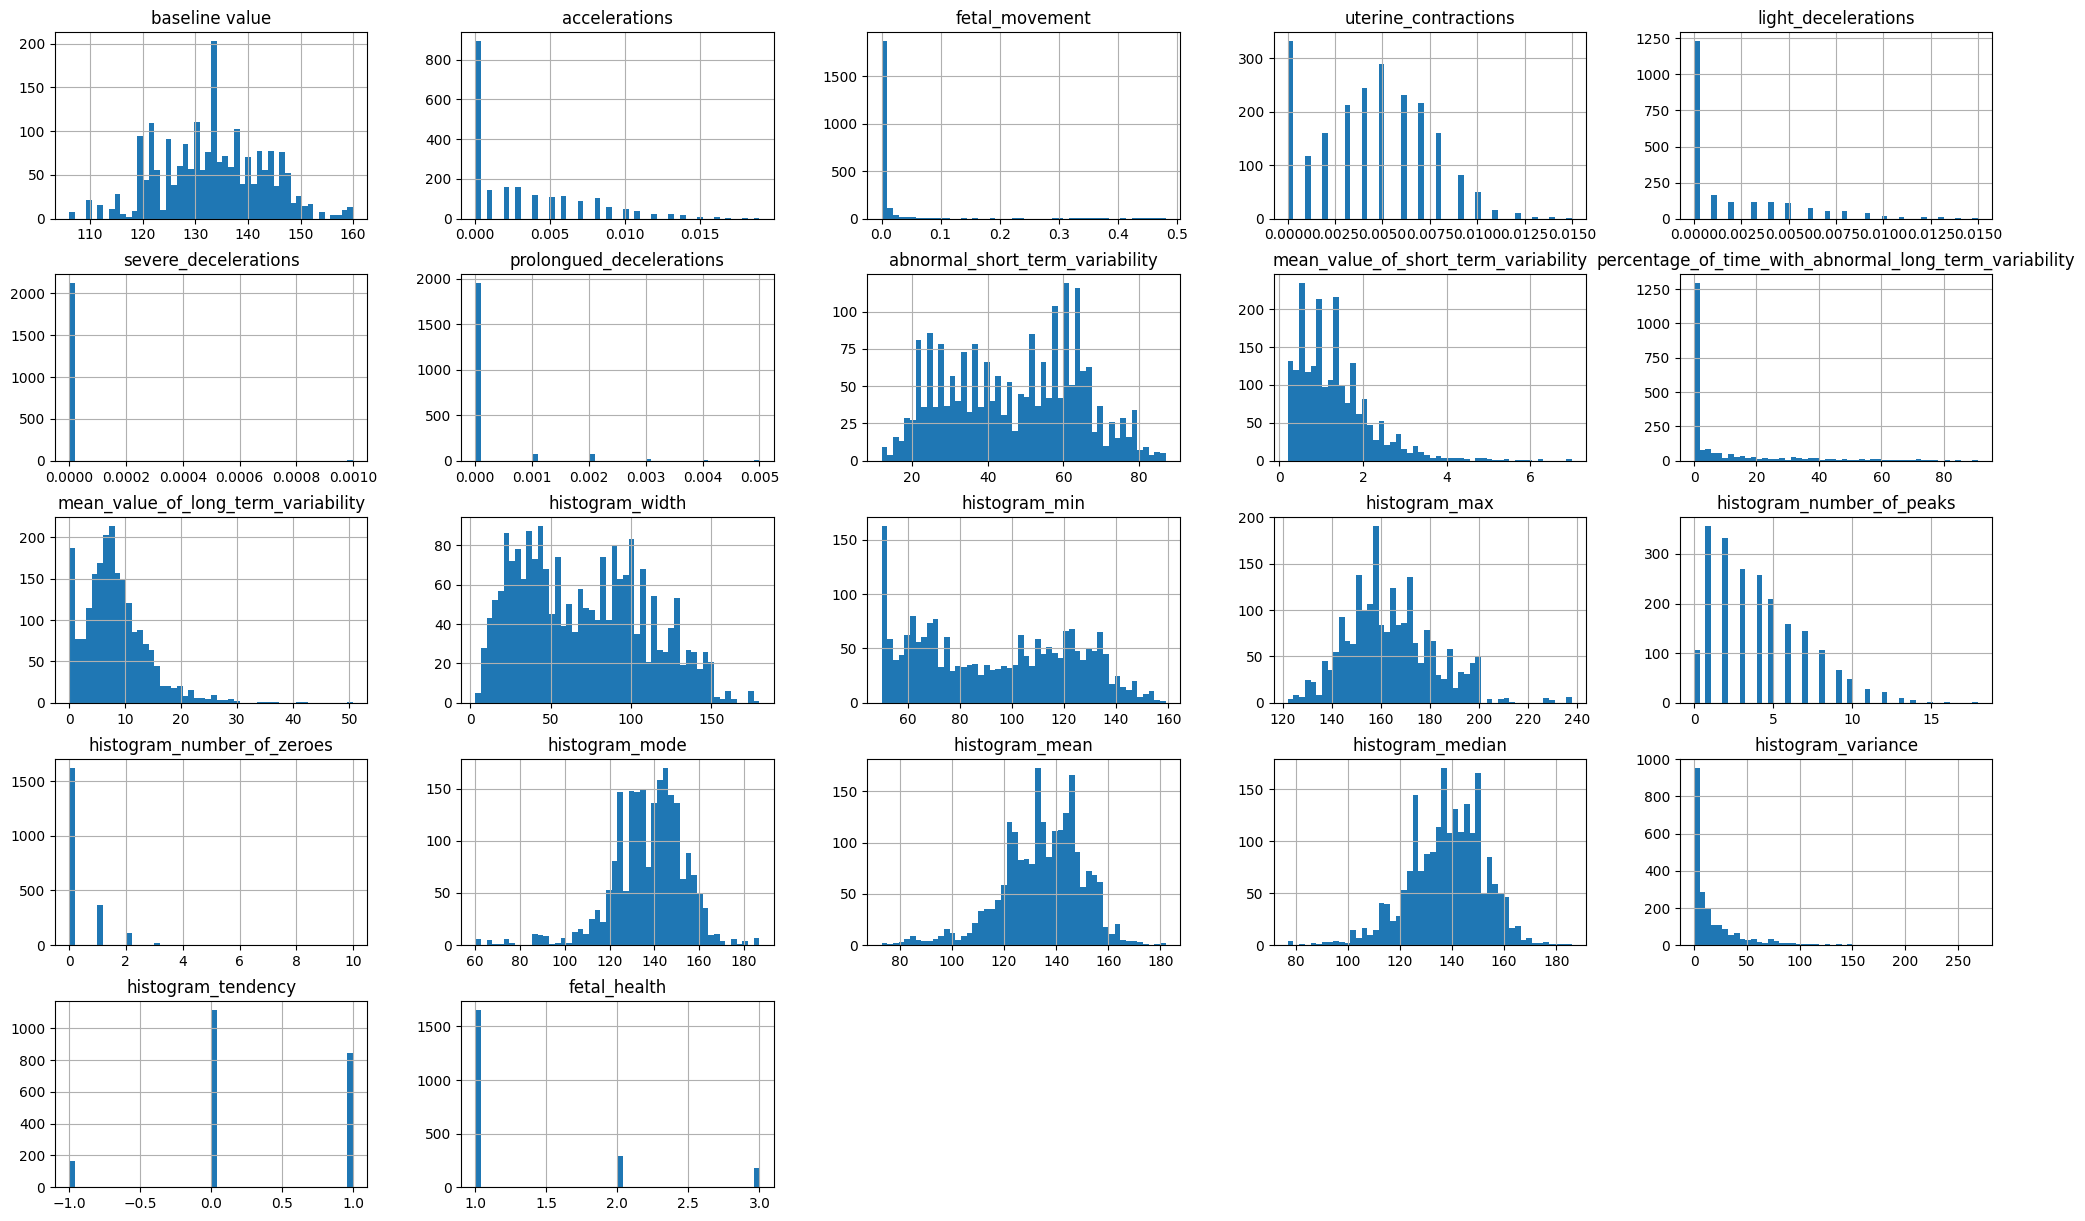

In [6]:
df.hist(bins=50,figsize=(25,15))
plt.show()

Dividing into train set and test test according to the way it'll be separated as discreate no matter how much re-run happen to this notebook

In [7]:
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1]<256*test_ratio

In [8]:
def split_train_test_by_id(data,test_ratio,id_column,hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio,hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [9]:
df_with_idx = df.reset_index()

In [10]:
df_with_idx.head()

,index,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [11]:
train_set,test_set = split_train_test_by_id(df_with_idx,0.2,'index')

In [12]:
train_set.shape,test_set.shape

((1712, 23), (414, 23))

In [13]:
train_set.head()

,index,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
6,6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0


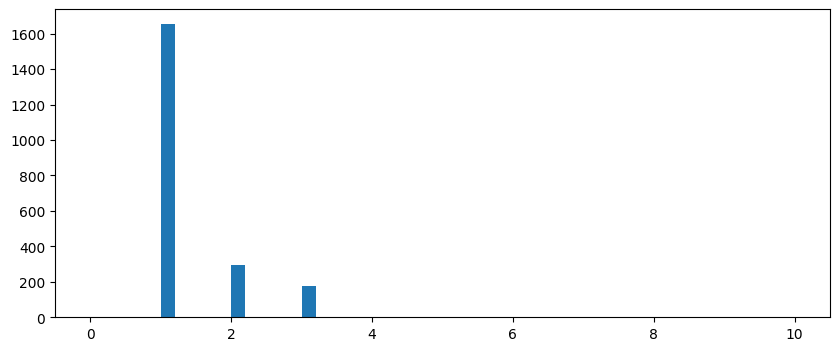

In [14]:
plt.figure(figsize=(10,4))
plt.hist(df['fetal_health'],bins=50,range=(0,10))
plt.show()

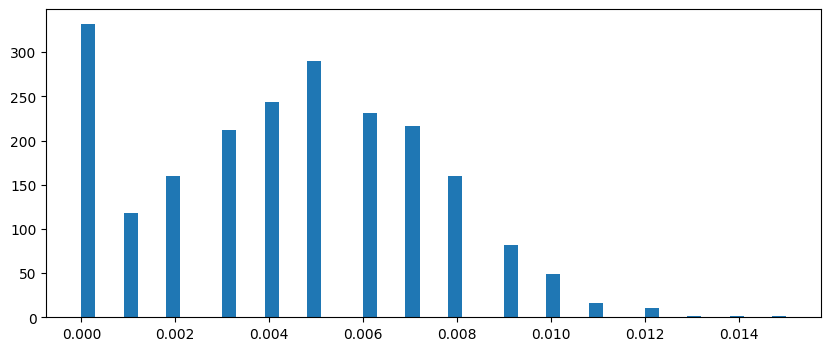

In [15]:
plt.figure(figsize=(10,4))
plt.hist(df['uterine_contractions'],bins=50)
plt.show()

In [16]:
df['uterine_cat'] = np.ceil(df['uterine_contractions']/1)
df['uterine_cat'] = df['uterine_cat'].where(df['uterine_contractions']<0.005,3)

In [17]:
df['uterine_cat'].value_counts()

uterine_cat
3.0    1060
1.0     734
0.0     332
Name: count, dtype: int64

In [18]:
df['uterine_cat'].value_counts()/len(df)

uterine_cat
3.0    0.498589
1.0    0.345249
0.0    0.156162
Name: count, dtype: float64

For even distribution I'm using StratifiedShuffleSplit

In [19]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [20]:
for train_idx, test_idx in split.split(df,df['uterine_cat']):
    strait_train_set = df.loc[train_idx]
    strait_test_set = df.loc[test_idx]

In [21]:
strait_train_set.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,uterine_cat
40,114.0,0.008,0.058,0.007,0.001,0.0,0.0,28.0,2.2,0.0,...,153.0,7.0,1.0,119.0,119.0,120.0,13.0,0.0,1.0,3.0
2003,125.0,0.006,0.002,0.009,0.004,0.0,0.0,59.0,2.1,0.0,...,164.0,8.0,1.0,131.0,122.0,126.0,27.0,0.0,1.0,3.0
1252,112.0,0.000,0.000,0.004,0.000,0.0,0.0,23.0,1.3,11.0,...,144.0,1.0,0.0,112.0,113.0,114.0,2.0,-1.0,1.0,1.0
350,141.0,0.000,0.008,0.000,0.000,0.0,0.0,75.0,0.3,49.0,...,145.0,1.0,0.0,143.0,141.0,143.0,0.0,1.0,2.0,0.0
997,129.0,0.007,0.000,0.006,0.000,0.0,0.0,23.0,1.5,0.0,...,159.0,1.0,0.0,133.0,139.0,141.0,11.0,0.0,1.0,3.0


In [22]:
for set in (strait_train_set,strait_test_set):
    set.drop('uterine_cat',axis=1,inplace=True)

In [23]:
def plot(x: str ,y: str = None, data: pd.DataFrame = df, Plot=plt.scatter,alpha=None) -> None:
    ploty = df[x]
    plotx = df[y]
    Plot(plotx,ploty,alpha)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

In [24]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health', 'uterine_cat'],
      dtype='object')

In [25]:
num_cols = list(df.select_dtypes(['int','float']).columns)
num_cols

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency',
 'fetal_health',
 'uterine_cat']

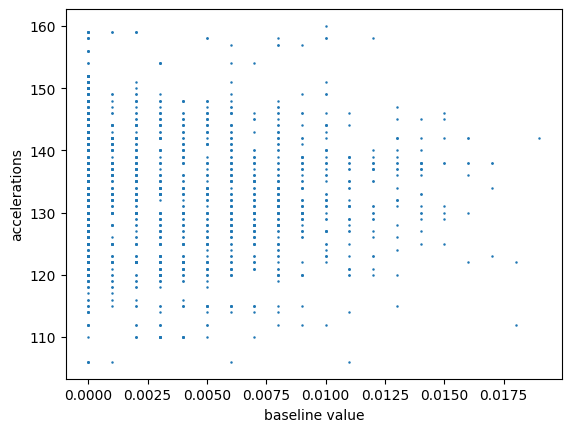

In [26]:
plot('baseline value','accelerations',alpha=0.6)

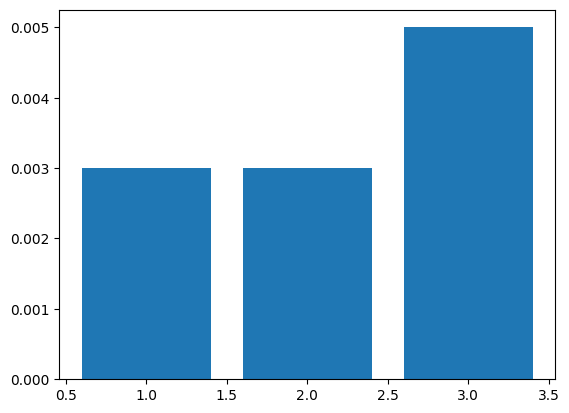

In [27]:
plt.bar(df['fetal_health'],df['prolongued_decelerations'])
plt.show()

In [28]:
corr_matrix = df.corr()

In [29]:
corr_matrix['fetal_health'].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

**Let's drop the columns which has the low correlation with the output**

In [30]:
corr_dict = dict(corr_matrix['fetal_health'])
corr_dict

{'baseline value': 0.14815112725708,
 'accelerations': -0.36406579288786295,
 'fetal_movement': 0.08801001103425976,
 'uterine_contractions': -0.20489372127986874,
 'light_decelerations': 0.0588704880404944,
 'severe_decelerations': 0.13193412558923656,
 'prolongued_decelerations': 0.48485918632134756,
 'abnormal_short_term_variability': 0.4711907528466762,
 'mean_value_of_short_term_variability': -0.10338211704475012,
 'percentage_of_time_with_abnormal_long_term_variability': 0.42614641992406366,
 'mean_value_of_long_term_variability': -0.22679706542348124,
 'histogram_width': -0.06878875666077884,
 'histogram_min': 0.06317490679278111,
 'histogram_max': -0.04526536674253357,
 'histogram_number_of_peaks': -0.023665951775175244,
 'histogram_number_of_zeroes': -0.016681812325617554,
 'histogram_mode': -0.2504118122228761,
 'histogram_mean': -0.22698517650772848,
 'histogram_median': -0.20503299554125634,
 'histogram_variance': 0.2066296220427258,
 'histogram_tendency': -0.13197641519785

In [31]:
drop_cols = [key for key,value in corr_dict.items()  if abs(value-0)<(0.05) ]

In [32]:
drop_cols

['histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes']

In [33]:
for set in (strait_train_set,strait_test_set):
    set.drop(drop_cols,axis=1,inplace=True)

In [34]:
strait_train_set.head(3)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
40,114.0,0.008,0.058,0.007,0.001,0.0,0.0,28.0,2.2,0.0,12.2,98.0,55.0,119.0,119.0,120.0,13.0,0.0,1.0
2003,125.0,0.006,0.002,0.009,0.004,0.0,0.0,59.0,2.1,0.0,7.8,90.0,74.0,131.0,122.0,126.0,27.0,0.0,1.0
1252,112.0,0.000,0.000,0.004,0.000,0.0,0.0,23.0,1.3,11.0,13.0,40.0,104.0,112.0,113.0,114.0,2.0,-1.0,1.0


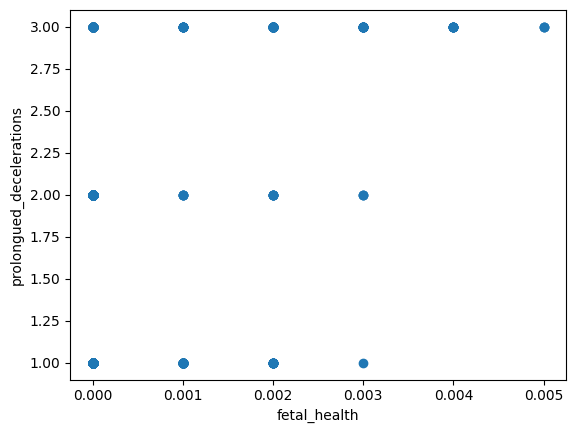

In [35]:
plot('fetal_health','prolongued_decelerations')

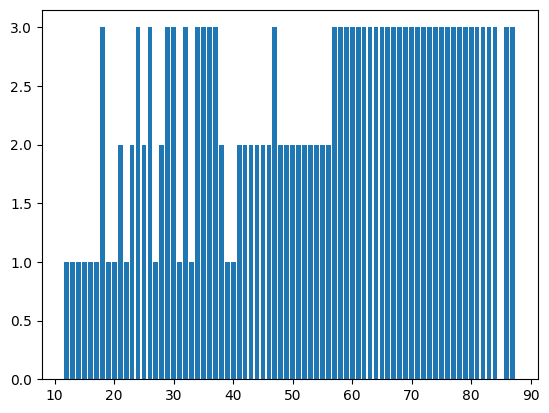

In [36]:
plt.bar('abnormal_short_term_variability','fetal_health',data=df)
plt.show()

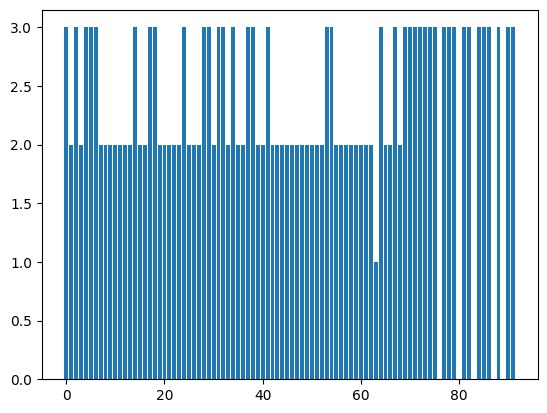

In [37]:
plt.bar('percentage_of_time_with_abnormal_long_term_variability','fetal_health',data=df)
plt.show()

In [38]:
class RemoveAttr(BaseEstimator,TransformerMixin):
    def __init__(self,target: str = 'fetal_health',drop_cols: list[int] =None) -> None:
        self.drop_cols = drop_cols
        self.target = target
    def fit(self,X,y=None):
        return self
    def transform(self,X: 'pandas.core.frame.DataFrame' ,y=None) -> 'pandas.core.frame.DataFrame':
        if not self.drop_cols:
            corr_matrix = X.corr()
            corr_dict = dict(corr_matrix[self.target])
            self.drop_cols = [key for key,value in corr_dict.items() if abs(value)<0.05]
            return X.drop(self.drop_cols,axis=1)
        else:
            return X.drop(self.drop_cols,axis=1)        

In [39]:
test_cus_trans_df = df.copy()
rm_attr = RemoveAttr()
test_cus_trans_df = rm_attr.transform(test_cus_trans_df)

In [40]:
test_cus_trans_df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_mode', 'histogram_mean', 'histogram_median',
       'histogram_variance', 'histogram_tendency', 'fetal_health',
       'uterine_cat'],
      dtype='object')

### Time for making pipeline

In [41]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [42]:
train_inputs = strait_train_set.drop('fetal_health', axis=1)
train_target = strait_train_set['fetal_health']

test_inputs = strait_test_set.drop('fetal_health', axis=1)
test_target = strait_test_set['fetal_health']

In [43]:
train_inputs.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
40,114.0,0.008,0.058,0.007,0.001,0.0,0.0,28.0,2.2,0.0,12.2,98.0,55.0,119.0,119.0,120.0,13.0,0.0
2003,125.0,0.006,0.002,0.009,0.004,0.0,0.0,59.0,2.1,0.0,7.8,90.0,74.0,131.0,122.0,126.0,27.0,0.0
1252,112.0,0.000,0.000,0.004,0.000,0.0,0.0,23.0,1.3,11.0,13.0,40.0,104.0,112.0,113.0,114.0,2.0,-1.0
350,141.0,0.000,0.008,0.000,0.000,0.0,0.0,75.0,0.3,49.0,4.6,9.0,136.0,143.0,141.0,143.0,0.0,1.0
997,129.0,0.007,0.000,0.006,0.000,0.0,0.0,23.0,1.5,0.0,12.6,44.0,115.0,133.0,139.0,141.0,11.0,0.0


In [44]:
imputer = SimpleImputer(strategy = 'mean')
scaler = MinMaxScaler()

In [45]:
pipeline = Pipeline([
    ('RemoveAtrr', RemoveAttr),
    ('imputer', imputer),
    ('scaler', scaler)
])

In [46]:
try:
    prepared_train_inputs, prepared_test_inputs = pipeline.fit_transform(train_inputs), pipeline.fit_transform(test_inputs)
except Exception as e:
    print(f'Due to the Exception ({e}) preparing dataset will propagate into the except block')
    prepared_train_inputs, prepared_test_inputs = imputer.fit_transform(train_inputs), imputer.fit_transform(test_inputs)
    prepared_train_inputs, prepared_test_inputs = scaler.fit_transform(prepared_train_inputs), scaler.fit_transform(prepared_test_inputs)

Due to the Exception ('DataFrame' object has no attribute 'fit') preparing dataset will propagate into the except block


### **Now let's label the train_inputs as [0,1] instead [1,3] for more convenience**

In [47]:
train_target = train_target.apply(lambda x: x-1)
test_target = test_target.apply(lambda x: x-1)

In [48]:
prepared_train_inputs[2]

array([0.11111111, 0.        , 0.        , 0.28571429, 0.        ,
       0.        , 0.        , 0.14666667, 0.16176471, 0.12087912,
       0.25641026, 0.21387283, 0.49541284, 0.40944882, 0.37383178,
       0.3490566 , 0.008     , 0.        ])

### Model Selection (all machine learning / scikit-learn classifier)

In [63]:
# List of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': XGBClassifier(objective='multi:softmax', num_class=3),
    'AdaBoost': AdaBoostClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_jobs=-1),
    'Neural Network': MLPClassifier(max_iter=500),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis()
}

#### using cross validation for determining suitable model  

In [64]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [76]:
param_grids =  {
    'Logistic Regression' : {
        'multi_class' : ['multinomial','ovr'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg'],
        'penalty': ['l2'],
        'max_iter': [100, 200, 300]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 10, 20, 50],
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_features': [None, 'sqrt', 'log2'],
        'min_samples_leaf': [1, 2, 4],
        'max_leaf_nodes': [None, 10, 20, 30]
    },
    
    'Gradient Boosting': {
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 10, 20],
        'subsample': [0.8, 0.9, 1.0],
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.5, 1],
        'algorithm': ['SAMME', 'SAMME.R']
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': [3, 4, 5],  # poly kern
        'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
        'class_weight': [None, 'balanced']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
        'p': [1, 2]  #  Minkowski metric (1=Manhattan, 2=Euclidean)
    },
    'Naive Bayes': {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
},
    'Quadratic Discriminant Analysis': {
        'reg_param': [0.0, 0.1, 0.5, 1.0],
        'tol': [1e-4, 1e-3, 1e-2],  # Tolerance to declare convergence
        'store_covariance': [True, False]
    }
}


In [65]:
for name,clf in classifiers.items():
    clf.fit(prepared_train_inputs,train_target)
    preds = clf.predict(prepared_train_inputs)
    print(f"Accuracy of {name}: {accuracy_score(train_target,preds)}")

Accuracy of Logistic Regression: 0.8917647058823529
Accuracy of Decision Tree: 0.9988235294117647
Accuracy of Gradient Boosting: 0.9988235294117647
Accuracy of AdaBoost: 0.8588235294117647
Accuracy of Support Vector Machine: 0.91
Accuracy of K-Nearest Neighbors: 0.9388235294117647
Accuracy of Naive Bayes: 0.7505882352941177
Accuracy of Random Forest: 0.9988235294117647
Accuracy of Neural Network: 0.94
Accuracy of Linear Discriminant Analysis: 0.8811764705882353
Accuracy of Quadratic Discriminant Analysis: 0.8164705882352942


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


#### let's tune the hyper parameters of Decision tree, random forest, Gradient boosting, Neural Networks, K Nearest Neighbors

In [78]:
best_classifiers ={}
for name,clf in classifiers.items():
    if name=='Random Forest' or name=='Neural Network':
        pass
    else:
        grid = GridSearchCV(estimator=clf,param_grid=param_grids[name], cv=cv,scoring='accuracy',n_jobs=-1)
        grid.fit(prepared_train_inputs,train_target)
        best_classifiers[name]=grid.best_estimator_
        print(f"best parameters for {name}: {grid.best_estimator_}")
        print(f'best cross-validation for {name}: {grid.best_score_:.2f}')
        

best parameters for Logistic Regression: LogisticRegression(C=100, multi_class='ovr', solver='newton-cg')
best cross-validation for Logistic Regression: 0.89
best parameters for Decision Tree: DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=10)
best cross-validation for Decision Tree: 0.92
best parameters for Gradient Boosting: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, 

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not supported with 'svd' solver.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/opt/conda/lib/

best parameters for Linear Discriminant Analysis: LinearDiscriminantAnalysis(solver='lsqr')
best cross-validation for Linear Discriminant Analysis: 0.87
best parameters for Quadratic Discriminant Analysis: QuadraticDiscriminantAnalysis(reg_param=0.1, store_covariance=True)
best cross-validation for Quadratic Discriminant Analysis: 0.84


/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/disc

#### Random Forest take hella lot of time to let's compute it separately

In [79]:
best_classifiers['Decision Tree']

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=10)

In [101]:
late_run_model = {'Random Forest': {
        'n_estimators': [200, 300, 500],
        'max_depth': [20,30],
        'criterion': ['entropy'],
        'max_features': [None, 'sqrt', 'log2'],
        'min_samples_split': [10,20],
        'min_samples_leaf': [2, 4],
        'bootstrap': [True, False]
    },
       'Neural Network': {
        'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],
        'activation': ['logistic', 'tanh', 'relu'],
        'solver': ['adam'],
        'alpha': [0.01,0.1,1],  # Regularization term
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
        'max_iter': [500]
    } 
}

In [90]:
grid = GridSearchCV(estimator=classifiers['Random Forest'],param_grid=late_run_model['Random Forest'], cv=cv,scoring='accuracy',n_jobs=-1)
grid.fit(prepared_train_inputs, train_target)
best_classifiers['Random Forest'] = grid.best_estimator_
print(f'Best Estimator for Random Forest: {grid.best_params_}')
print(f'best cross validation accuracy for Random Forest: {grid.best_score_:.2f}')

Best Estimator for Random Forest: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
best cross validation accuracy for Random Forest: 0.94


In [96]:
def find_n_estimators(n_estimators):
    rf = RandomForestClassifier(
    bootstrap=False,
    criterion='entropy',
    max_depth=30,
    max_features='log2',
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=n_estimators,  
    random_state=42  
)
    scores = cross_val_score(rf,prepared_train_inputs,train_target,cv=cv, scoring='accuracy')
    print(f"Accuracy for each fold: {scores}")
    print(f"Mean Accuracy: {np.mean(scores)}")
find_n_estimators(400)

Accuracy for each fold: [0.92647059 0.96176471 0.92058824 0.92647059 0.94411765]
Mean Accuracy: 0.9358823529411765


#### Let's build a multi-layer perceptron

In [102]:
grid = GridSearchCV(estimator=classifiers['Neural Network'],param_grid=late_run_model['Neural Network'], cv=cv,scoring='accuracy',n_jobs=-1)
grid.fit(prepared_train_inputs, train_target)
best_classifiers['Neural Network'] = grid.best_estimator_
print(f'Best Estimator for Neural Network: {grid.best_params_}')
print(f'best cross validation accuracy for Neural Network: {grid.best_score_:.2f}')

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Best Estimator for Neural Network: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'adam'}
best cross validation accuracy for Neural Network: 0.92


In [103]:
best_model = best_classifiers['Gradient Boosting']

In [104]:
test_preds = best_model.predict(prepared_test_inputs)
print(f"accuracy of best model in test set : {accuracy_score(test_target,test_preds)}")

accuracy of best model in test set : 0.931924882629108


### now we go!